In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
df = pd.read_csv('agricultural_yield.csv')
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [6]:
X = df[['Soil_Quality','Seed_Variety','Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm','Irrigation_Schedule']]

In [7]:
y = df['Yield_kg_per_hectare'].values

In [8]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = Sequential([
  Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)),
  Dense(32, activation = 'relu'),
  Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2, verbose=1)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 540166.9375 - mae: 707.7504 - val_loss: 560286.9375 - val_mae: 721.9274
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 520676.8125 - mae: 692.8170 - val_loss: 510959.0000 - val_mae: 688.1557
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 454616.2500 - mae: 646.3979 - val_loss: 371886.2812 - val_mae: 585.4723
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 309332.1562 - mae: 529.3579 - val_loss: 176607.2500 - val_mae: 400.3267
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131604.8125 - mae: 339.1421 - val_loss: 44999.9062 - val_mae: 191.3031
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33127.7422 - mae: 157.5758 - val_loss: 12879.5010 - val_mae: 91.7430
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12028.2500 - mae: 88.2303 - val_loss: 9599.3691 - val_mae: 77.7105
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9623.0098 - mae: 77.9235 - val_loss: 8929

In [17]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose = 1)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2918.3743 - mae: 43.9485 
Test Loss: 2695.07568359375, Test MAE: 41.65122604370117


In [15]:
y_pred = model.predict(X_test)
y_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[ 452.91574],
       [ 676.4439 ],
       [1085.1708 ],
       [ 671.52594],
       [ 812.44055],
       [ 989.6059 ],
       [ 317.16016],
       [ 580.8478 ],
       [ 441.08554],
       [ 796.59174],
       [ 613.3077 ],
       [ 673.3011 ],
       [ 633.69763],
       [ 731.16705],
       [ 845.37384],
       [ 677.4787 ],
       [ 966.5119 ],
       [ 474.46466],
       [ 583.67084],
       [ 367.8753 ],
       [ 781.9903 ],
       [ 795.658  ],
       [ 368.19   ],
       [ 821.2426 ],
       [1015.2289 ],
       [ 588.5712 ],
       [ 642.36774],
       [ 965.4708 ],
       [ 614.6773 ],
       [ 631.483  ],
       [ 677.46735],
       [ 796.3198 ],
       [ 833.3633 ],
       [ 789.14514],
       [ 527.1534 ],
       [ 715.6989 ],
       [ 708.69977],
       [1024.0758 ],
       [ 247.93353],
       [ 639.92084],
       [ 936.8604 ],
       [ 896.27167],
       [ 777.5921 ],
       [ 756.37244],
       [ 627.07635],
       [ 830.20624],
       [ 636.14545],
       [ 590.

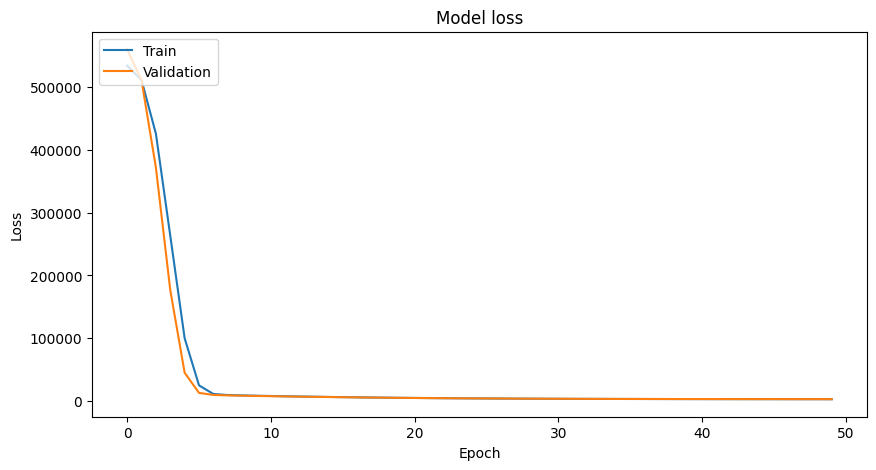

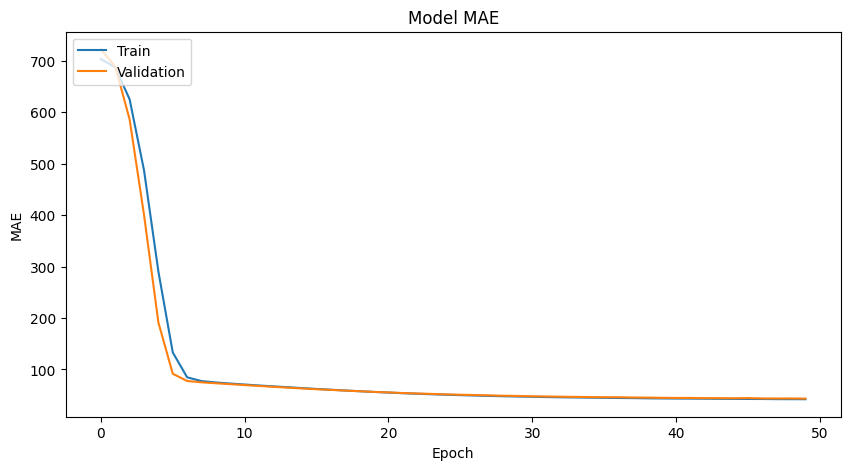

In [16]:
# prompt: plot the values of epochs

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<ipython-input-20-c3b0645f4049>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-20-c3b0645f4049>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


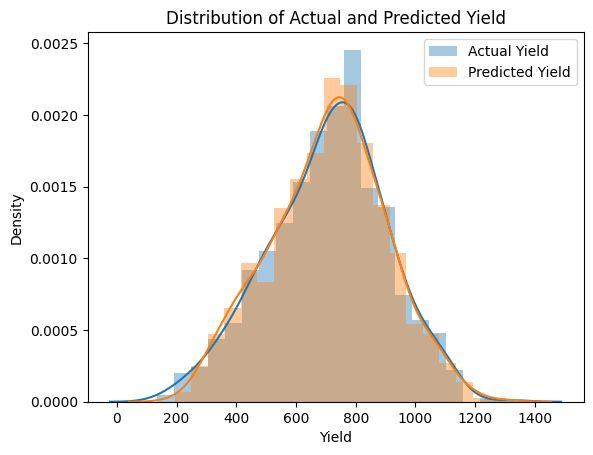

In [20]:
# Distribution plots
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()